<a href="https://colab.research.google.com/github/alaaguedda/prostate-cancer/blob/main/prostate_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
!pip install kaggle
from google.colab import files
files.upload()  # Choose kaggle.json
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d ankushpanday1/prostate-cancer-prediction-dataset
!unzip prostate-cancer-prediction-dataset.zip


In [ ]:


df = pd.read_csv("prostate_cancer_prediction.csv")  # adjust name if different
df.head()


###file size

In [ ]:
import os

file_path = "prostate_cancer_prediction.csv"

# Get file size in bytes
size_bytes = os.path.getsize(file_path)

# Convert to KB, MB
size_kb = size_bytes / 1024
size_mb = size_kb / 1024

print(f"File size: {size_bytes} bytes")
print(f"File size: {size_kb:.2f} KB")
print(f"File size: {size_mb:.2f} MB")


#Store and retrieve set from drive 👇

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import shutil

# Source (where your dataset is currently located)
src_path = "prostate_cancer_prediction.csv"

# Destination (inside your Drive, adjust folder if needed)
dst_path = "/content/drive/MyDrive/prostate_cancer_prediction.csv"

shutil.copy(src_path, dst_path)
print("File copied to Drive ✅")


In [ ]:
file_path = "/content/drive/MyDrive/prostate_cancer_prediction.csv"
df = pd.read_csv(file_path)
df.head()


#Basic Exploration

overall analysis

In [ ]:
for col in df.columns:
  print(f"{col} : {df[col].value_counts()}")

check for missing values values

In [ ]:
for col in df.columns:
  print(f"{col} : {df[col].isnull().sum()}")

print unique values by category


In [ ]:
df['Alcohol_Consumption'].unique()
df['Race_African_Ancestry'].unique()

#Filtering by Condition

In [ ]:
psa_accepted = df[(df['Age'] > 60) & (df['PSA_Level'] > 4)]
psa_accepted.head()

#Grouping
#####Group by Cancer_Stage and compute average PSA_Level and average Age.

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
cancer_stage_age = df.groupby("Cancer_Stage")["Age"].mean()
cancer_stage_age.plot(kind="bar")
plt.show()

cancer_stage_psa = df.groupby("Cancer_Stage")["PSA_Level"].mean()
cancer_stage_psa.plot(kind="bar")
plt.show()



In [ ]:
stages = df['Cancer_Stage'].unique()
for stage in stages:
  print(f"{stage} : {df[df['Cancer_Stage'] == stage]['Age'].mean()}")

for stage in stages:
  print(f"{stage} : {df[df['Cancer_Stage'] == stage]['PSA_Level'].mean()}")



#Boolean Filtering
#####Find patients who have Difficulty_Urinating AND Weak_Urine_Flow but Biopsy_Result is negative.

In [ ]:
df['Difficulty_Urinating'].value_counts()

In [ ]:
df['Weak_Urine_Flow'].value_counts()

In [ ]:
df["Biopsy_Result"].value_counts()

In [ ]:
false_biopsy = df[((df['Difficulty_Urinating'] == "Yes") & (df['Weak_Urine_Flow'] == "Yes") &  (df['Biopsy_Result'] == "Benign")) ]
false_biopsy.head()

In [ ]:
false_biopsy_percentage = (false_biopsy.shape[0] / df.shape[0]) * 100
print(f"percentage of false biopsy is : {false_biopsy_percentage}")

#Distribution Visualization
#####Plot histograms of PSA_Level, BMI, and Age

In [ ]:
plt.hist(df['PSA_Level'])
plt.show()
plt.hist(df['BMI'])
plt.show()
plt.hist(df['Age'])
plt.show()


#####Compare distributions between patients with and without cancer (Biopsy_Result).

In [ ]:
plt.scatter( df['BMI'] ,df['Age'],  c=['pink' if result == "Benign" else 'red' for result in df['Biopsy_Result']])
plt.show()

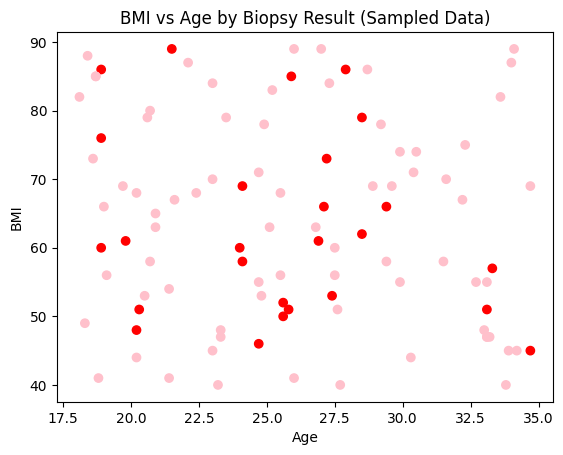

In [ ]:
# Sample a smaller subset of the data
df_sampled = df.sample(n=100, random_state=42) # Sample 1000 rows, use random_state for reproducibility

plt.scatter( df_sampled['BMI'],df_sampled['Age'], c=['pink' if result == "Benign" else 'red' for result in df_sampled['Biopsy_Result']])
plt.title('BMI vs Age by Biopsy Result (Sampled Data)')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()

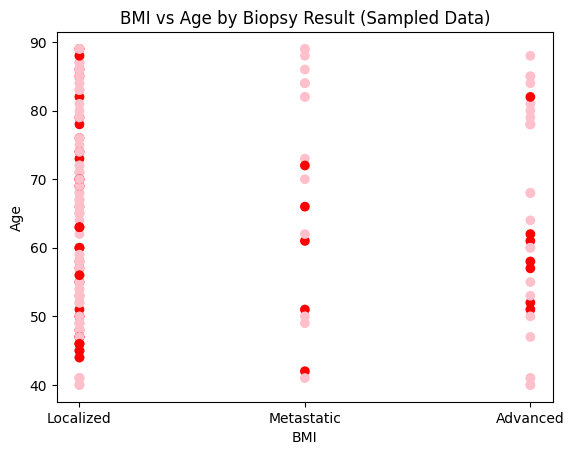

In [ ]:
# Sample a smaller subset of the data
df_sampled = df.sample(n=200, random_state=42) # Sample 1000 rows, use random_state for reproducibility

# Create the scatter plot with the sampled data
plt.scatter( df_sampled['Cancer_Stage'],df_sampled['Age'], c=['pink' if result == "Benign" else 'red' for result in df_sampled['Biopsy_Result']])
plt.title('BMI vs Age by Biopsy Result (Sampled Data)')
plt.xlabel('BMI')
plt.ylabel('Age')
plt.show()

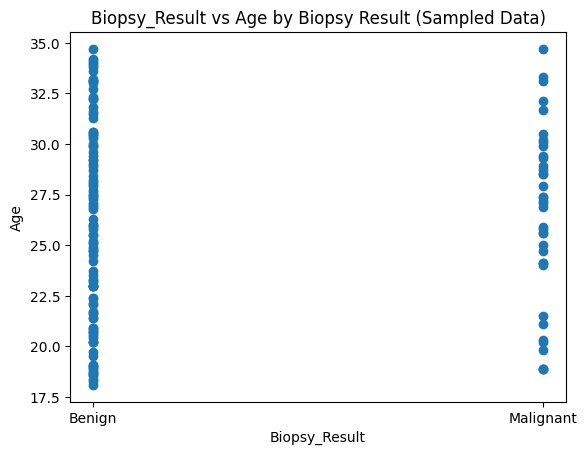

In [ ]:
# Sample a smaller subset of the data
df_sampled = df.sample(n=150, random_state=42) # Sample 1000 rows, use random_state for reproducibility
plt.scatter( df_sampled['Biopsy_Result'],df_sampled['BMI'])
plt.title('Biopsy_Result vs Age by Biopsy Result (Sampled Data)')
plt.xlabel('Biopsy_Result')
plt.ylabel('Age')
plt.show()

In [ ]:
plt.hist2d(df['Biopsy_Result'],df['BMI'], bins=30, cmap='Blues')
plt.colorbar(label='Density')
plt.title('Density Plot of Age vs BMI')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()

# Task
Create a 2D density plot using the 'Biopsy_Result' and 'BMI' columns from the file "biopsy_and_bmi.csv". Encode the 'Biopsy_Result' column numerically. The color of the density plot should be pale blue for areas with few points and darker blue for areas with more points.

## Encode categorical data

### Subtask:
Convert the 'Biopsy_Result' column into numerical values.


**Reasoning**:
Map the 'Biopsy_Result' column to numerical values for plotting.



In [ ]:
biopsy_mapping = {'Benign': 0, 'Malignant': 1}
df['Biopsy_Result_Encoded'] = df['Biopsy_Result'].map(biopsy_mapping)
df.head()

## Create density plot

### Subtask:
Generate a 2D histogram using the encoded 'Biopsy_Result' and 'BMI' columns.


In [ ]:
plt.hist2d(df['Biopsy_Result_Encoded'], df['BMI'], bins=30, cmap='Blues')
plt.colorbar(label='Density')
plt.title('Density Plot of Biopsy Result (Encoded) vs BMI')
plt.xlabel('Biopsy Result (Encoded)')
plt.ylabel('BMI')
plt.show()

#crosstab & heatmap
#####Create a crosstab between Race_African_Ancestry and Biopsy_Result

In [ ]:
crosstab_result = pd.crosstab(df['Race_African_Ancestry'],df['Biopsy_Result'])
print(crosstab_result)

#####heatmap with seaborn

In [ ]:
import seaborn as sns

In [ ]:
sns.heatmap(crosstab_result)

#Boxplots by Stage
#####Draw a boxplot of PSA_Level grouped by Cancer_Stage.

In [ ]:
sns.boxplot(x='Cancer_Stage',y='PSA_Level',data=df)


#Lifestyle & Risk Comparison


#####3D Scatter Plot of Age, BMI, and PSA_Level

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

stage_mapping = {'Localized':0,'Metastatic': 1, 'Advanced': 2}
df['Cancer_Stage_Encoded'] = df['Cancer_Stage'].map(stage_mapping)

scatter = ax.scatter(df['Age'], df['BMI'], df['PSA_Level'], c=df['Cancer_Stage_Encoded'], cmap='viridis', s=20)

ax.set_xlabel('Age')
ax.set_ylabel('BMI')
ax.set_zlabel('PSA_Level')
ax.set_title('3D Scatter Plot of Age, BMI, and PSA_Level by Cancer Stage')

cbar = fig.colorbar(scatter,ax=ax,pad=0.1)
cbar.set_label("cancer stage")
cbar.set_ticks([0,1,2])
cbar.set_ticklabels(['Localized','Metastatic','Advanced'])

plt.show()

#####Plot bar charts showing the proportion of patients with Smoking_History = Yes across different Cancer_Stage

In [ ]:
cancer_stage_smokers = df.groupby("Cancer_Stage")["Smoking_History"].value_counts().unstack(fill_value=0)
cancer_stage_smokers_percentage = cancer_stage_smokers['Yes'] / cancer_stage_smokers.sum(axis=1) *100
cancer_stage_smokers_percentage.plot(kind="bar")
plt.title('Percentage of Smokers by Cancer Stage')
plt.xlabel('Cancer Stage')
plt.ylabel('Percentage of Smokers')
plt.show()